In [1]:
#Importing All Required Libaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from warnings import filterwarnings
filterwarnings(action='ignore')

In [6]:
#Loading Datasets
pd.set_option('display.max_columns',10,'display.width',1000)
train = pd.read_csv("C:\\Users\\murth\\Downloads\\train.csv")
test = pd.read_csv("C:\\Users\\murth\\Downloads\\test.csv")
train.head()

,PassengerId,Survived,Pclass,Name,Sex,...,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,...,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,...,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,...,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,...,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,...,0,373450,8.0500,NaN,S


In [8]:
#Display shape
train.shape

(891, 12)

In [10]:
test.shape

(418, 11)

In [12]:
#Checking for Null values
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [14]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [29]:
#Description of dataset
trainn=train.describe(include="all")
trainn

,PassengerId,Survived,Pclass,Name,Sex,...,Parch,Ticket,Fare,Cabin,Embarked
count,8.000000,8.000000,8.000000,4.0,4.0,...,8.000000,4.0,8.000000,4.0,4.0
unique,NaN,NaN,NaN,3.0,4.0,...,NaN,4.0,NaN,4.0,4.0
top,NaN,NaN,NaN,891.0,891.0,...,NaN,891.0,NaN,204.0,889.0
freq,NaN,NaN,NaN,2.0,1.0,...,NaN,1.0,NaN,1.0,1.0
mean,478.044230,111.733804,113.268089,NaN,NaN,...,112.273456,NaN,192.323930,NaN,NaN
std,320.815971,314.871366,314.252344,NaN,NaN,...,314.659717,NaN,330.625663,NaN,NaN
min,1.000000,0.000000,0.836071,NaN,NaN,...,0.000000,NaN,0.000000,NaN,NaN
25%,248.890382,0.000000,1.750000,NaN,NaN,...,0.000000,NaN,12.818250,NaN,NaN
50%,446.000000,0.435215,2.654321,NaN,NaN,...,0.190797,NaN,31.602104,NaN,NaN
75%,724.125000,1.000000,3.000000,NaN,NaN,...,2.104543,NaN,165.352371,NaN,NaN


In [31]:
trainn.groupby('Survived').mean()

,PassengerId,Pclass,Name,Sex,Age,...,Parch,Ticket,Fare,Cabin,Embarked
Survived,,,,,,,,,,,
0.000000,124.945191,1.293036,NaN,NaN,9.572687,...,0.000000,NaN,6.409125,NaN,NaN
0.435215,446.000000,2.654321,NaN,NaN,28.849559,...,0.190797,NaN,31.602104,NaN,NaN
1.000000,724.125000,3.000000,NaN,NaN,48.500000,...,2.104543,NaN,165.352371,NaN,NaN
8.000000,8.000000,8.000000,4.0,4.0,8.000000,...,8.000000,4.0,8.000000,4.0,4.0
111.733804,478.044230,113.268089,NaN,NaN,115.596327,...,112.273456,NaN,192.323930,NaN,NaN
314.871366,320.815971,314.252344,NaN,NaN,242.905673,...,314.659717,NaN,330.625663,NaN,NaN
891.000000,891.000000,891.000000,NaN,NaN,714.000000,...,891.000000,NaN,891.000000,NaN,NaN


In [33]:
trainn.corr()

,PassengerId,Survived,Pclass,Name,Sex,...,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,1.000000,0.625832,0.627601,NaN,NaN,...,0.626622,NaN,0.741366,NaN,NaN
Survived,0.625832,1.000000,0.999996,NaN,NaN,...,0.999999,NaN,0.983067,NaN,NaN
Pclass,0.627601,0.999996,1.000000,NaN,NaN,...,0.999997,NaN,0.983323,NaN,NaN
Name,NaN,NaN,NaN,1.000000,0.999998,...,NaN,0.999998,NaN,0.999922,0.999998
Sex,NaN,NaN,NaN,0.999998,1.000000,...,NaN,1.000000,NaN,0.999941,1.000000
Age,0.678317,0.997477,0.997647,NaN,NaN,...,0.997550,NaN,0.991509,NaN,NaN
SibSp,0.627329,0.999998,0.999997,NaN,NaN,...,1.000000,NaN,0.983449,NaN,NaN
Parch,0.626622,0.999999,0.999997,NaN,NaN,...,1.000000,NaN,0.983306,NaN,NaN
Ticket,NaN,NaN,NaN,0.999998,1.000000,...,NaN,1.000000,NaN,0.999941,1.000000
Fare,0.741366,0.983067,0.983323,NaN,NaN,...,0.983306,NaN,1.000000,NaN,NaN


In [35]:
male_ind = len(train[train['Sex'] == 'male'])
print("No of Males in Titanic:",male_ind)

No of Males in Titanic: 1


In [37]:
female_ind = len(train[train['Sex'] == 'female'])
print("No of Females in Titanic:",female_ind)

No of Females in Titanic: 0


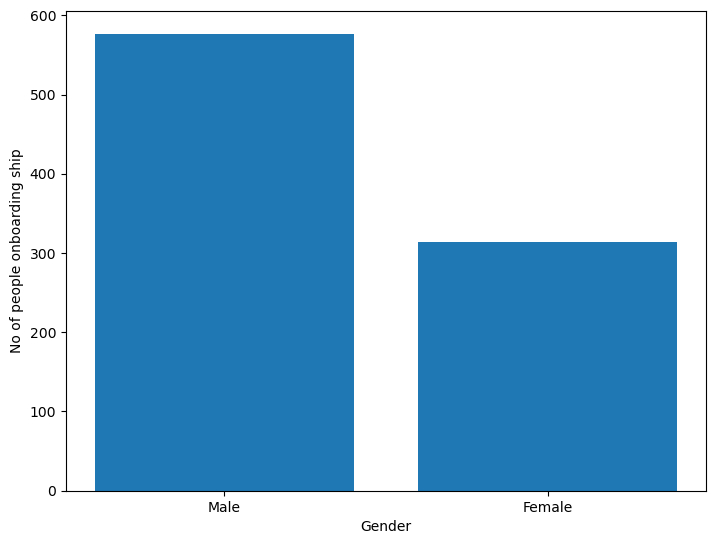

In [39]:
#Plotting
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
gender = ['Male','Female']
index = [577,314]
ax.bar(gender,index)
plt.xlabel("Gender")
plt.ylabel("No of people onboarding ship")
plt.show()

In [41]:
alive = len(train[train['Survived'] == 1])
dead = len(train[train['Survived'] == 0])

In [43]:
train.groupby('Sex')[['Survived']].mean()

,Survived
Sex,
2,NaN
577,NaN
891,891.0
male,NaN


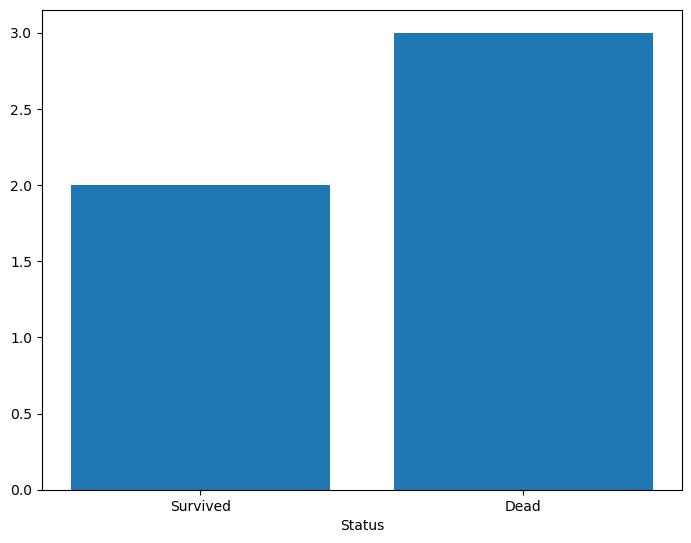

In [45]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
status = ['Survived','Dead']
ind = [alive,dead]
ax.bar(status,ind)
plt.xlabel("Status")
plt.show()

Text(0.5, 1.0, "Bar graph of people accrding to ticket class in which people couldn't survive")

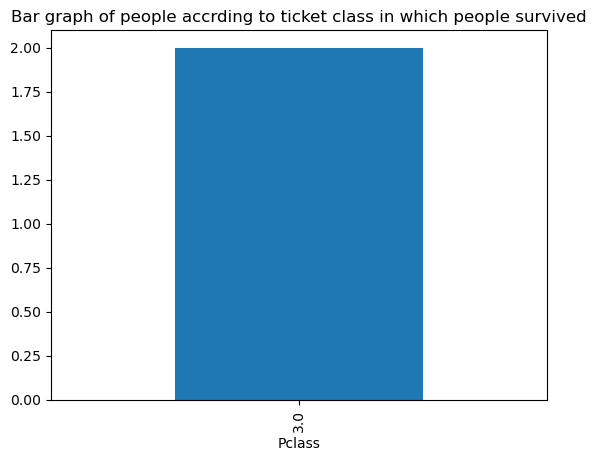

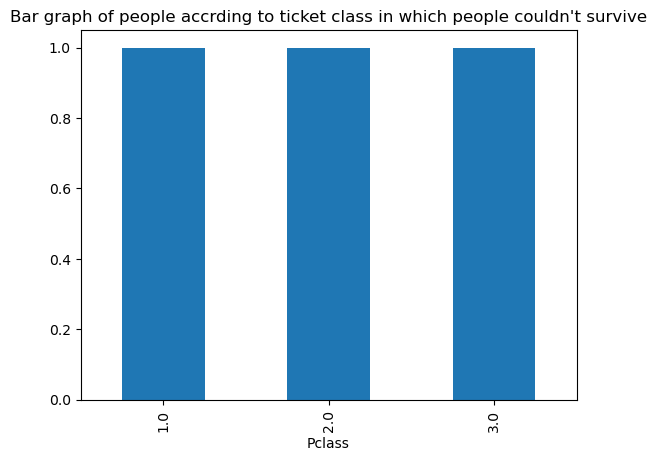

In [47]:
plt.figure(1)
train.loc[train['Survived'] == 1, 'Pclass'].value_counts().sort_index().plot.bar()
plt.title('Bar graph of people accrding to ticket class in which people survived')


plt.figure(2)
train.loc[train['Survived'] == 0, 'Pclass'].value_counts().sort_index().plot.bar()
plt.title('Bar graph of people accrding to ticket class in which people couldn\'t survive')

([<matplotlib.axis.XTick at 0x1ddd4732c00>,
 [Text(0, 0, '0'),
  Text(10, 0, '10'),
  Text(20, 0, '20'),
  Text(30, 0, '30'),
  Text(40, 0, '40'),
  Text(50, 0, '50'),
  Text(60, 0, '60'),
  Text(70, 0, '70'),
  Text(80, 0, '80'),
  Text(90, 0, '90')])

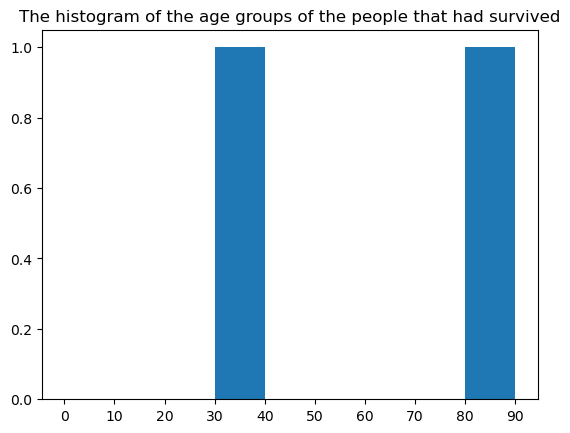

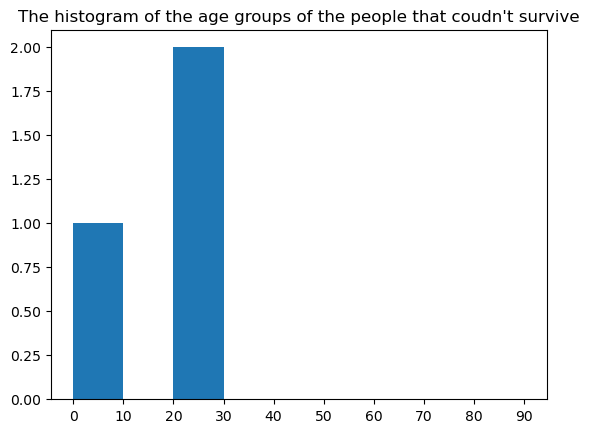

In [49]:
plt.figure(1)
age  = train.loc[train.Survived == 1, 'Age']
plt.title('The histogram of the age groups of the people that had survived')
plt.hist(age, np.arange(0,100,10))
plt.xticks(np.arange(0,100,10))


plt.figure(2)
age  = train.loc[train.Survived == 0, 'Age']
plt.title('The histogram of the age groups of the people that coudn\'t survive')
plt.hist(age, np.arange(0,100,10))
plt.xticks(np.arange(0,100,10))

In [51]:
train[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
5,891.000000,891.000000
2,1.000000,1.000000
4,8.000000,1.000000
3,1.102743,0.486592
1,0.523008,0.383838
0,0.000000,0.000000


In [53]:
train[["Pclass", "Survived"]].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
5,891.000000,891.000000
4,3.000000,0.666667
0,0.836071,0.486592
3,2.308642,0.383838
1,1.000000,0.000000
2,2.000000,0.000000


In [55]:
train[["Age", "Survived"]].groupby(['Age'], as_index=False).mean().sort_values(by='Age', ascending=True)

,Age,Survived
0,0.420000,0.000000
1,14.526497,0.486592
2,20.125000,0.000000
3,28.000000,0.000000
4,29.699118,0.383838
5,38.000000,1.000000
6,80.000000,1.000000
7,714.000000,891.000000


In [57]:
train[["Embarked", "Survived"]].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
2,889,891.0
0,3,NaN
1,644,NaN
3,S,NaN


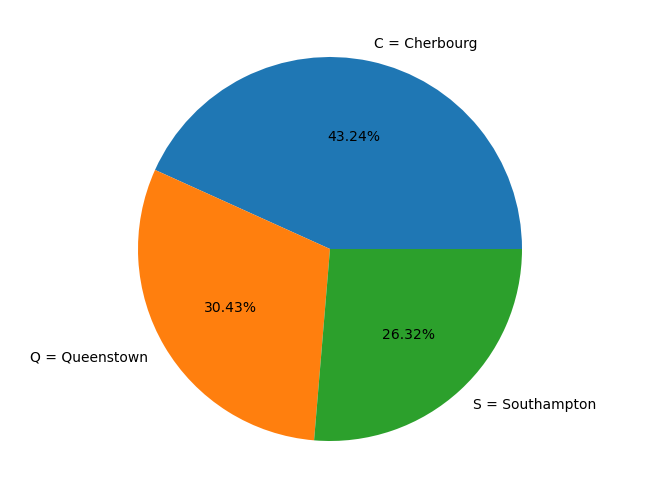

In [59]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
l = ['C = Cherbourg', 'Q = Queenstown', 'S = Southampton']
s = [0.553571,0.389610,0.336957]
ax.pie(s, labels = l,autopct='%1.2f%%')
plt.show()

In [61]:
test.describe(include="all")

,PassengerId,Pclass,Name,Sex,Age,...,Parch,Ticket,Fare,Cabin,Embarked
count,418.000000,418.000000,418,418,332.000000,...,418.000000,418,417.000000,91,418
unique,NaN,NaN,418,2,NaN,...,NaN,363,NaN,76,3
top,NaN,NaN,"Kelly, Mr. James",male,NaN,...,NaN,PC 17608,NaN,B57 B59 B63 B66,S
freq,NaN,NaN,1,266,NaN,...,NaN,5,NaN,3,270
mean,1100.500000,2.265550,NaN,NaN,30.272590,...,0.392344,NaN,35.627188,NaN,NaN
std,120.810458,0.841838,NaN,NaN,14.181209,...,0.981429,NaN,55.907576,NaN,NaN
min,892.000000,1.000000,NaN,NaN,0.170000,...,0.000000,NaN,0.000000,NaN,NaN
25%,996.250000,1.000000,NaN,NaN,21.000000,...,0.000000,NaN,7.895800,NaN,NaN
50%,1100.500000,3.000000,NaN,NaN,27.000000,...,0.000000,NaN,14.454200,NaN,NaN
75%,1204.750000,3.000000,NaN,NaN,39.000000,...,0.000000,NaN,31.500000,NaN,NaN


In [63]:
#Droping Useless Columns
train = train.drop(['Ticket'], axis = 1)
test = test.drop(['Ticket'], axis = 1)

In [65]:
train = train.drop(['Cabin'], axis = 1)
test = test.drop(['Cabin'], axis = 1)

In [67]:
train = train.drop(['Name'], axis = 1)
test = test.drop(['Name'], axis = 1)

In [69]:
#Feature Selection
column_train=['Age','Pclass','SibSp','Parch','Fare','Sex','Embarked']
#training values
X=train[column_train]
#target value
Y=train['Survived']

In [71]:
X['Age'].isnull().sum()
X['Pclass'].isnull().sum()
X['SibSp'].isnull().sum()
X['Parch'].isnull().sum()
X['Fare'].isnull().sum()
X['Sex'].isnull().sum()
X['Embarked'].isnull().sum()

7

In [73]:
#now we have to fill all the missing values
#age have 177  missing values
#either we fill missing values with mean or median form existing values 
X['Age']=X['Age'].fillna(X['Age'].median())
X['Age'].isnull().sum()

0

In [75]:
X['Embarked'] = train['Embarked'].fillna(method ='pad')
X['Embarked'].isnull().sum()

0

In [386]:
#Training Testing and Spliting the model
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3,random_state=7)

In [387]:
#Using LogisticRegression
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,Y_train)
Y_pred = model.predict(X_test)

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(Y_test,Y_pred))

Accuracy Score: 0.7574626865671642


In [397]:
#Confusion Matrix
from sklearn.metrics import accuracy_score,confusion_matrix
confusion_mat = confusion_matrix(Y_test,Y_pred)
print(confusion_mat)

[[130  26]
 [ 39  73]]


In [415]:
#Using Support Vector
from sklearn.svm import SVC
model1 = SVC()
model1.fit(X_train,Y_train)

pred_y = model1.predict(X_test)

from sklearn.metrics import accuracy_score
print("Acc=",accuracy_score(Y_test,pred_y))

Acc= 0.6604477611940298


In [1]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
confusion_mat = confusion_matrix(Y_test,pred_y)
print(confusion_mat)
print(classification_report(Y_test,pred_y))

NameError: name 'Y_test' is not defined

In [412]:
#Using KNN Neighbors
from sklearn.neighbors import KNeighborsClassifier
model2 = KNeighborsClassifier(n_neighbors=5)
model2.fit(X_train,Y_train)
y_pred2 = model2.predict(X_test)

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(Y_test,y_pred2))

Accuracy Score: 0.6604477611940298


In [414]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
confusion_mat = confusion_matrix(Y_test,y_pred2)
print(confusion_mat)
print(classification_report(Y_test,y_pred3))

[[126  30]
 [ 61  51]]
              precision    recall  f1-score   support

           0       0.79      0.83      0.81       156
           1       0.74      0.69      0.71       112

    accuracy                           0.77       268
   macro avg       0.76      0.76      0.76       268
weighted avg       0.77      0.77      0.77       268



In [410]:
#Using GaussianNB
from sklearn.naive_bayes import GaussianNB
model3 = GaussianNB()
model3.fit(X_train,Y_train)
y_pred3 = model3.predict(X_test)

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(Y_test,y_pred3))

Accuracy Score: 0.7686567164179104


In [411]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
confusion_mat = confusion_matrix(Y_test,y_pred3)
print(confusion_mat)
print(classification_report(Y_test,y_pred3))

[[129  27]
 [ 35  77]]
              precision    recall  f1-score   support

           0       0.79      0.83      0.81       156
           1       0.74      0.69      0.71       112

    accuracy                           0.77       268
   macro avg       0.76      0.76      0.76       268
weighted avg       0.77      0.77      0.77       268



In [408]:
#Using Decision Tree
from sklearn.tree import DecisionTreeClassifier
model4 = DecisionTreeClassifier(criterion='entropy',random_state=7)
model4.fit(X_train,Y_train)
y_pred4 = model4.predict(X_test)

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(Y_test,y_pred4))

Accuracy Score: 0.7425373134328358


In [409]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
confusion_mat = confusion_matrix(Y_test,y_pred4)
print(confusion_mat)
print(classification_report(Y_test,y_pred4))

[[132  24]
 [ 45  67]]
              precision    recall  f1-score   support

           0       0.75      0.85      0.79       156
           1       0.74      0.60      0.66       112

    accuracy                           0.74       268
   macro avg       0.74      0.72      0.73       268
weighted avg       0.74      0.74      0.74       268



In [418]:
results = pd.DataFrame({
    'Model': ['Logistic Regression','Support Vector Machines', 'Naive Bayes','KNN' ,'Decision Tree'],
    'Score': [0.75,0.66,0.76,0.66,0.74]})

result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(9)

,Model
Score,
0.76,Naive Bayes
0.75,Logistic Regression
0.74,Decision Tree
0.66,Support Vector Machines
0.66,KNN


In [ ]:
#Hence I will use Naive Bayes algorithms for training my model.
#This project was completely made by Amber Kakkar under Project Based Learning at ICT Academy IIT Kanpur